<a href="https://colab.research.google.com/github/arghads9177/association-rule-shop/blob/master/association_rule_market_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Market Basket Analysis on Real Market Data

## About Dataset

The purpose of this data science project is to perform a market basket analysins on a purchase records of a shop.

Market basket analysis is a data mining technique used by retailers to increase sales by better understanding of customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

## Details of data

The dataset has **999** rows and **16** columns. Each columns contains the item purchased from the shop. The values in each column contains boolean data i.e. either **True** or **False**, which represents either the item purchased or not by a customer in that purchase. These purchases of items can be analysed and association rules can be generated using Market Basket Analysis by algorithms like **Apriori** Algorithm.

## Data Dictionary

The features of the dataset represents each item are as follows:

* Apple
* Bread
* Butter
* Cheese
* Corn
* Dill
* Eggs
* Ice cream
* Kidney Beans
* Milk
* Nutmeg
* Onion
* Sugar
* Unicorn
* Yogurt
* Chocolate


The datatype of each feature is number containing binary values False or True.

## Market Basket Analysis

Market Basket Analysis stands as a crucial technique employed by major retailers to unveil connections among products. This method involves searching for combinations of items that frequently appear together in customer transactions. In simpler terms, it empowers retailers to pinpoint correlations between the items purchased by customers.

Association Rules are widely used to analyze retail basket or transaction data and are intended to identify strong patterns discovered in transaction data.


## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* This will answer the questions like:

    * Which items are frequently bought together?
    * If a user buys an item X, which item is he/she likely to buy next?

### Load Necessary Libraries

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

sns.set_style("darkgrid")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Load Data and Get What it Contains

In [40]:
import os
folder_path = "drive/MyDrive/Colab Notebooks/dscourse/data"
file_path = os.path.join(folder_path, "basket_analysis.csv")
df = pd.read_csv(file_path, index_col=0)

In [41]:
df.head()

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [42]:
# Print shape
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 999
Number of columns: 16


### Observations

* We have **999** basket for us to compute the association for each item that sold in the shop. There are **16** items that sold in the shop.

#### Checking Data Types

By checking datatype of each column we can identify the categorical and numerical columns present in the dataset.

In [43]:
df.dtypes

Apple           bool
Bread           bool
Butter          bool
Cheese          bool
Corn            bool
Dill            bool
Eggs            bool
Ice cream       bool
Kidney Beans    bool
Milk            bool
Nutmeg          bool
Onion           bool
Sugar           bool
Unicorn         bool
Yogurt          bool
chocolate       bool
dtype: object

### Observations

* Each column contains numeric values.

#### Missing Value Detection

Missing value detection is essential to chack the quality of the data. If present impute it with proper value so that quality of the data is maintained for robust statistical analysis.

In [44]:
df.isnull().sum()

Apple           0
Bread           0
Butter          0
Cheese          0
Corn            0
Dill            0
Eggs            0
Ice cream       0
Kidney Beans    0
Milk            0
Nutmeg          0
Onion           0
Sugar           0
Unicorn         0
Yogurt          0
chocolate       0
dtype: int64

### Observations

* No missing value present in any column in the dataset

> Since the dataset is already tabulated one hot encoded data frame, we will straight away and use the dataset to be analyzed with **apriori** algorithm to check association rule.

### Association Rule Mining

Association rule mining is a process that deploys pattern recognition to identify and quantify relationship between different, yet related items.

A simple association rules use case -

Eggs and Bread are frequently purchased together. With this finding, you can increase sales by:

* Placing eggs and bread next to each other so that when a customer buys one of the products, they don't have to walk to buy the other product
* Advertising to buyer of either eggs or bread in order to increase that person's propensity to purchase the (paired) other product.
* Offer discounts on both eggs and bread if the customer buys both of them in one purchase.

**Association Rule**: "if item eggs are purchased,then the possibility of buying bread is __"

Can also be represented as:

* {eggs} -> {bread}

#### Advantages :

* Relatively fast method
* Works well on small quantities of data
* Few(if any) feature engineering requirement

#### Three Ways to Measure Association :
* Support
* Confidence
* Lift

In [45]:
# This function apply the apriori algorithm to find freqent itemsets and apply association rules to generate associations among the itemsets
def associated_item_rules(support, threshold):
  # Applying apriori algorithm on item df
  frequent_items = apriori(df, min_support= support, use_colnames= True)

  # Storing the association rules for the item
  rules = association_rules(frequent_items, metric= 'lift', min_threshold= threshold)

  # Sort the rules on lift and support
  rules = rules.sort_values(["lift", "support"], ascending= False).reset_index(drop= True)

  return frequent_items, rules

In [46]:
def get_unique_pairs(data):
  # Initialize unique pairs set for storing result
  unique_pairs = set()

  # Iterate through each row of data
  for line in data:
    # Split two items separated by comma
    item1, item2 = line.split(',')
    # Create a tuple to represent ordered pair
    pair = (item1, item2)
    # Create reverse pair considering order(e.g. a,b and b, a are not same)
    rev_pair = (item2, item1)
    # Add lexicographically smaller pair in the unique pairs
    unique_pairs.add(min(pair, rev_pair))
  return list(unique_pairs)

### Which items are frequently bought together?

In [47]:
items, rules = associated_item_rules(0.19, 1)
items = []
for i in range(0, len(rules)):
  antecedents = list(rules.iloc[i]["antecedents"])
  consequents = list(rules.iloc[i]["consequents"])
  item = ",".join(antecedents + consequents)
  items.append(item)
# Remove duplicate in the list
unique_items = get_unique_pairs(items)
print("=" * 60)
print("Frequently bought together items:")
print("=" * 60)
for item in unique_items:
  print(f"{item} \n")

Frequently bought together items:
('Cheese', 'Kidney Beans') 

('Ice cream', 'Sugar') 

('Nutmeg', 'Onion') 

('Ice cream', 'Kidney Beans') 

('Corn', 'Ice cream') 

('Nutmeg', 'Yogurt') 

('Milk', 'chocolate') 

('Butter', 'Onion') 

('Corn', 'chocolate') 

('Corn', 'Milk') 

('Onion', 'Yogurt') 

('Butter', 'Yogurt') 

('Kidney Beans', 'chocolate') 

('Ice cream', 'Onion') 

('Kidney Beans', 'Milk') 

('Yogurt', 'chocolate') 

('Dill', 'Onion') 

('Bread', 'Yogurt') 

('Butter', 'Nutmeg') 

('Butter', 'Ice cream') 

('Cheese', 'Nutmeg') 

('Corn', 'Kidney Beans') 

('Onion', 'chocolate') 

('Butter', 'chocolate') 

('Butter', 'Milk') 

('Sugar', 'Yogurt') 

('Nutmeg', 'Sugar') 

('Butter', 'Corn') 

('Ice cream', 'chocolate') 

('Onion', 'Sugar') 

('Milk', 'Yogurt') 

('Dill', 'chocolate') 

('Dill', 'Milk') 

('Corn', 'Yogurt') 

('Butter', 'Sugar') 

('Butter', 'Kidney Beans') 

('Kidney Beans', 'Yogurt') 



### If a user buys an item X, which item is he/she likely to buy next?

In [48]:
def associated_items(item):
  items, rules = associated_item_rules(0.19, 1)

  # Find the rules where ancedents contain the specified item and lift of the rule is more than 1
  featured_rules = rules[(rules["lift"] > 1) & (rules["antecedents"].apply(lambda x: item in x))]
  return featured_rules[["antecedents", "consequents"]]

In [49]:
# Check which items are purchased with Ice Cream
associated_items("Ice cream")

,antecedents,consequents
9,(Ice cream),(Butter)
28,(Ice cream),(Kidney Beans)
32,(Ice cream),(chocolate)
39,(Ice cream),(Sugar)
40,(Ice cream),(Onion)
47,(Ice cream),(Corn)


## Frequent Itemsets Visualization

> To visualize the support of different itemsets.

In [50]:
frequent_items, rules = associated_item_rules(0.19, 1)

In [56]:
# Set length of each itemsets
frequent_items["length"] = frequent_items["itemsets"].apply(lambda x: len(x))

# Get the itemsets having length more than or equal to 2
frequent_itemsets_2 = frequent_items[frequent_items["length"] >= 2].sort_values("support", ascending= False).reset_index(drop= True).head(10)


Text(0.5, 1.0, 'Support of itemsets')

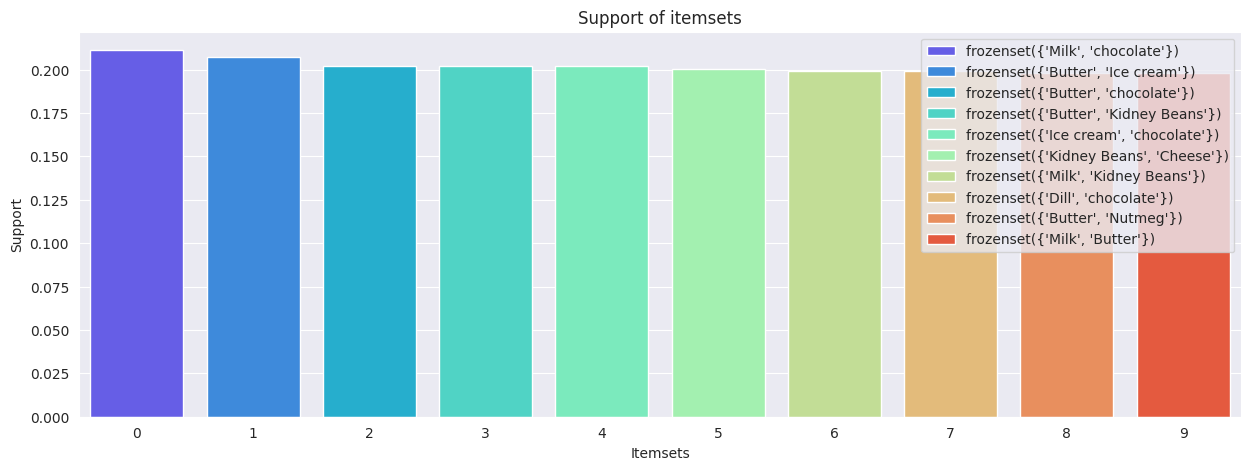

In [52]:
# Plot bar graph
plt.figure(figsize=(15,5))

sns.barplot(x= range(len(frequent_itemsets_2)),
            y= frequent_itemsets_2["support"],
            hue= [ str(i) for i in frequent_itemsets_2["itemsets"]],
            palette="rainbow")
plt.xlabel("Itemsets")
plt.ylabel("Support")
plt.title("Support of itemsets")
# plt.xticks(rotation=90)

### Observations

* Milk and chocolates are mostly purchased together.
* Butter is purchased with many items such as Ice Cream, chocolate, Kidney Beans, Nutmeg and Milk.
* chocolate is also a popular item purchased with many items like Milk, butter, Ice Cream and Dill.

## Association Rules Visualization

> To visualize the relationship between support and confidence of the rules.

Text(0.5, 1.0, 'Support vs Confidence')

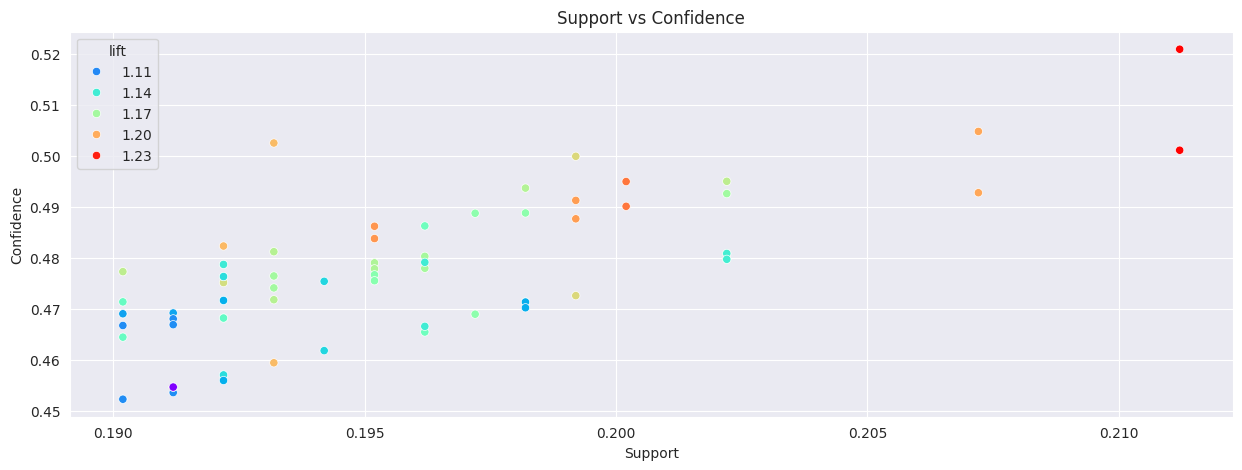

In [53]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= rules["support"], y= rules["confidence"], sizes=rules["lift"], hue= rules["lift"], palette="rainbow")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.title("Support vs Confidence")

### Observations

* As support increases confidence and lift are also increases.

### Visualize the connections between items with network graphs.

Text(0.5, 1.0, 'Network Graph of Association Rules')

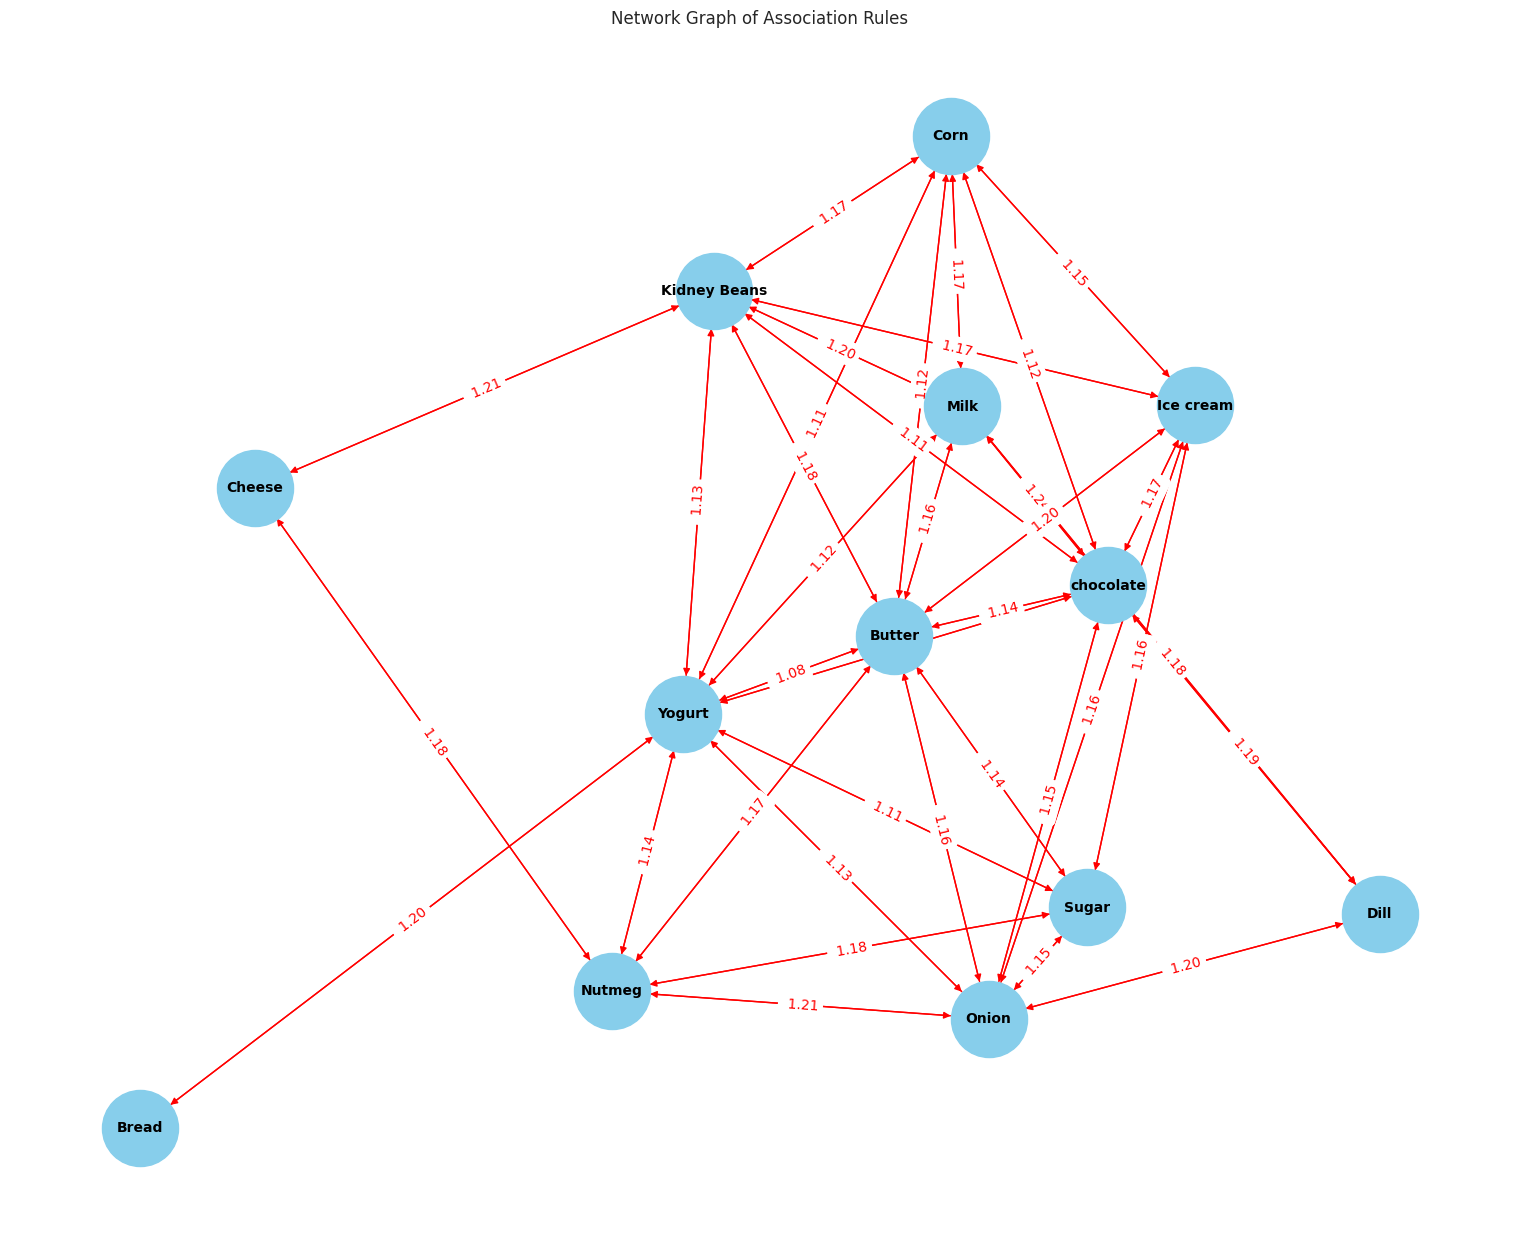

In [54]:
# Create a network graph object
G = nx.DiGraph()

# Add nodes and edges from rules
for _, rule in rules.iterrows():
  for antecedent in rule["antecedents"]:
    for consequent in rule["consequents"]:
      G.add_edge(antecedent, consequent, weight= rule["lift"])

# Draw the network plot
plt.figure(figsize=(15,12))
pos = nx.spring_layout(G, k= 1)
nx.draw(G, pos, with_labels= True, node_size= 3000, node_color= "skyblue", font_size= 10, font_weight= "bold", edge_color= "red")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels= {(u, v): f'{d["weight"]: .2f}' for u, v, d in G.edges(data= True)}, font_color= "red")
plt.title("Network Graph of Association Rules")


### Observations

* There are association presents among most of the items like chocolate, Milk, Ice Cream, Butter, Kidney Beans, Onion, Sugar, Yogurt and Nutmeg.
* Bread, Cheese, Dill doesn't have strong association rule with others.
* Eggs, Unicorn, Apple, Corn are isolated items.